In [2]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [3]:
class QuadraticEquationState(TypedDict):
    a: int
    b: int
    c: int
    
    discriminant: float
    equation: str
    roots: str

In [4]:
def show_equation(state: QuadraticEquationState) -> QuadraticEquationState:
    equation = f"{state['a']}x^2 + {state['b']}x + {state['c']} = 0"
    return {'equation':equation}

def calculate_discriminant(state: QuadraticEquationState) -> QuadraticEquationState:
    descriminant = state['b']**2 - 4 * state['a'] * state['c']
    return {'discriminant': descriminant}

def real_roots(state: QuadraticEquationState) -> QuadraticEquationState:
    
    root1 = (-state['b'] + state['discriminant']**0.5) / (2 * state['a'])
    root2 = (-state['b'] - state['discriminant']**0.5) / (2 * state['a'])
    roots = f"Roots are {root1} and {root2}"
    return {'roots': roots}

def equal_roots(state: QuadraticEquationState) -> QuadraticEquationState:
    
    root = -state['b'] / (2 * state['a'])
    roots = f"Both roots are equal and the value is {root}"
    return {'roots': roots}

def no_real_roots(state: QuadraticEquationState) -> QuadraticEquationState:
    roots = "No real roots exist for this equation"
    return {'roots': roots}

In [5]:
def check_discriminant(state: QuadraticEquationState) -> QuadraticEquationState:
    if state['discriminant'] > 0:
        return 'real_roots'
    elif state['discriminant'] == 0:
        return 'equal_roots'
    else:
        return 'no_real_roots'

In [6]:
graph = StateGraph(QuadraticEquationState)

graph.add_node('show_equation', show_equation)
graph.add_node('calculate_discriminant', calculate_discriminant)
graph.add_node('real_roots',real_roots)
graph.add_node('equal_roots', equal_roots)
graph.add_node('no_real_roots', no_real_roots)



graph.add_edge(START, 'show_equation')
graph.add_edge('show_equation', 'calculate_discriminant')

graph.add_conditional_edges('calculate_discriminant', check_discriminant)
graph.add_edge('real_roots', END)
graph.add_edge('equal_roots', END)
graph.add_edge('no_real_roots', END)

workflow = graph.compile()

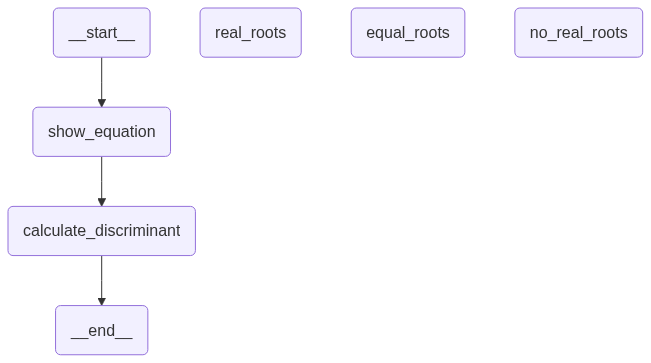

In [7]:
from IPython.display import display, Markdown,Image
Image(workflow.get_graph().draw_mermaid_png())

In [8]:
intial_state = {'a':4, 'b':-5, 'c':-4}
workflow.invoke(intial_state)

{'a': 4,
 'b': -5,
 'c': -4,
 'discriminant': 89,
 'equation': '4x^2 + -5x + -4 = 0',
 'roots': 'Roots are 1.8042476415070754 and -0.5542476415070754'}